## Question 5

For this question I decided to explore the relationship between salaries and wages & inflation. I used CPI as my measure of inflation.

Prior to conducting any analysis, intuitively I suspected there would be a positive association between salaries and wages and CPI.

I did some very quick googling just to ensure that my approach made sense- and found two documents which further shaped the direction of my analyis. These documents are included in this repository in the `Supporting Documents` directory.

<u>Supporting Documents:</u>

1. dp09-06-Analysing wage and price dynamics in NZ
2. p20045coll4_54-Exploring Tradable and Non-Tradable Inflation in Consumer Prices


In the Abstract of the first document listed above it says:

> _We find that there is a joint causality between wages and disaggregate inflation. An increase in wage inflation forecasts an increase in non-tradable inflation._

I found on the Stats NZ website that they publish a tradable and non-tradable inflation series, and given the quote above it made sense to me to use this data for my analysis.

I decided to create two models of the form:

$$ \text{Model 1:} \ Y_1 = \beta_1X_1 + \beta_0$$

$$ \text{Model 2:} \ Y_2 = \beta_1X_1 + \beta_0$$

Where the independent variable of each model is:

$Y_1$: is New Zealand's CPI for Tradeable groups.

$Y_2$: is New Zealand's CPI for Non-tradeable groups.

and the explanatory variable of each model is:

$X_1$: is Salaries and Wages data

I thought that Simple Linear Regression was a sensible and appropriate choice, as it was of interest to me to interpret the $\beta$ coefficients, to understand the association between salaries and wages and inflation in NZ.

Given the quote above showing that previous research had showed a positive association between wages and non-tradeable inflation, I decided that I would perform a 1-tailed test, testing only for a positive association.
As I had no reference for how salaries and wages may affect Tradeable inflation, I thought a 2-sided test appropriate.

**Distinction between Tradeable and Non-Tradeable Goods and Services:**

> Goods and services whose prices are primarily influenced by world prices and international supply and demand, and whose prices are primarily determined by factors such as domestic demand and supply. Goods and services which enter international trade and satisfy the law of one price, or at an appropriate relative price that could satisfy the law of one price, can be defined as tradable. All other goods and services will be defined as non-tradable.

Further information about the CPI and how it is calculated can be found on the Stats NZ website- https://www.stats.govt.nz/topics/consumers-price-index

**Datasets used:**

1. consumers-price-index-june-2024-quarter-tradeables-and-non-tradeables.csv
2. Business financial data: March 2024 quarter

#### Hypotheses:

__Model 1:__

$\mathcal{H}_0: \text{There is no association between salaries and wages and the CPI for Tradeable groups in New Zealand} \ (\beta_1 = 0)$ \
$\mathcal{H}_1: \text{There is an association between salaries and wages and the CPI for Tradeable groups in New Zealand} \ (\beta_1 \neq 0)$



__Model 2:__

$\mathcal{H}_0: \text{There is no positive association between salaries and wages and the CPI for Non-tradeable groups in New Zealand} \ (\beta_1 = 0)$ \
$\mathcal{H}_1: \text{There is a positive association between salaries and wages and the CPI for Non-tradeable groups in New Zealand} \ (\beta_1 > 0)$




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

SALARIES_AND_WAGES_FILENAME = "salaries_and_wages_df.xlsx"
CPI_FILENAME = "consumers-price-index-june-2024-quarter-tradeables-and-non-tradeables.csv"

In [2]:
salaries_and_wages = pd.read_excel(f'./data/{SALARIES_AND_WAGES_FILENAME}')
cpi = pd.read_csv(f'./data/{CPI_FILENAME}')

In [3]:
# Group salaries and wages data by Period - explanatory variable
grouped = salaries_and_wages.groupby('Period')['Data_value'].agg('sum')

In [4]:
cpi.Group.unique()

array(['CPI All Groups for New Zealand',
       'CPI Non-standard Tradable & Non-tradable Component Series',
       'CPI Level 1 Groups Tradables and Non-tradables',
       'CPI Level 2 Subgroups Tradables and Non-tradables',
       'CPI Level 3 Classes Tradables and Non-tradables'], dtype=object)

In [5]:
# Filter cpi to include only Tradeables and Non-tradeables
cpi = cpi[cpi['Group'] == 'CPI Non-standard Tradable & Non-tradable Component Series']

In [6]:
# Perform an inner join on the two dataframes, using the 'Period' column as the key
df = pd.merge(left=grouped, right=cpi.loc[:, ['Period', 'Data_value', 'Series_title_1']], on='Period', how='inner')

In [7]:
df.rename(columns={'Data_value_x': 'Salaries_and_wages', 'Data_value_y': 'CPI', 'Series_title_1': 'CPI_Disaggregation'}, inplace=True)
df

,Period,Salaries_and_wages,CPI,CPI_Disaggregation
0,2016.06,33188.598,991.493384,Tradable All Groups
1,2016.06,33188.598,976.693372,Non-Tradable All Groups
2,2016.09,33113.652,991.493384,Tradable All Groups
3,2016.09,33113.652,981.791697,Non-Tradable All Groups
4,2016.12,34179.942,994.328922,Tradable All Groups
...,...,...,...,...
59,2023.09,61624.023,1294.000000,Non-Tradable All Groups
60,2023.12,63533.993,1198.000000,Tradable All Groups
61,2023.12,63533.993,1308.000000,Non-Tradable All Groups
62,2024.03,62389.365,1190.000000,Tradable All Groups


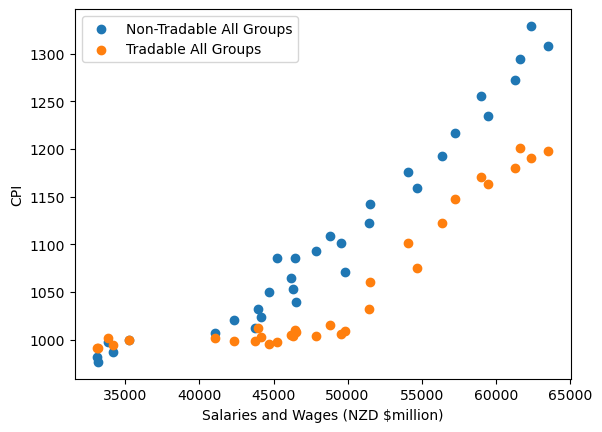

In [8]:
# Scatterplot of Salaries and Wages vs CPI
for label, df_group in df.groupby('CPI_Disaggregation'):
    plt.scatter(df_group['Salaries_and_wages'], df_group['CPI'], label=label)

plt.xlabel('Salaries and Wages (NZD $million)')
plt.ylabel('CPI')
plt.legend()
plt.show()

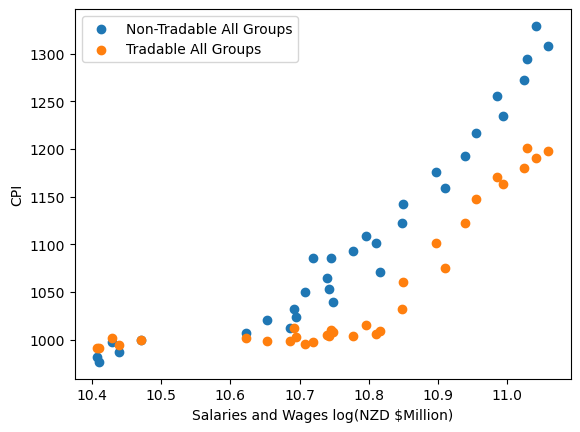

In [9]:
# Scatterplot of log(Salaries and Wages) vs CPI
for label, df_group in df.groupby('CPI_Disaggregation'):
    plt.scatter(np.log(df_group['Salaries_and_wages']), df_group['CPI'], label=label)

plt.xlabel('Salaries and Wages log(NZD $Million)')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [10]:
# Explanatory and Target variables
X = df['Salaries_and_wages'].to_numpy().reshape(-1, 1)[::2]
y1 = df[df['CPI_Disaggregation'] == 'Tradable All Groups'].loc[:, 'CPI'].to_numpy().reshape(-1, 1)
y2 = df[df['CPI_Disaggregation'] == 'Non-Tradable All Groups'].loc[:, 'CPI'].to_numpy().reshape(-1, 1)

In [11]:
# Model 1
model_1 = sm.OLS(y1, X).fit()
m1_pval = model_1.t_test(model_1.params).pvalue.item()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2006.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):                    9.64e-30
Time:                        13:31:21   Log-Likelihood:                         -201.22
No. Observations:                  32   AIC:                                      404.4
Df Residuals:                      31   BIC:                                      405.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0213      0.000     44.784      0.000       0.020       0.022
==============================================================================
Omnibus:                        4.545   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.056
Skew:                           0.863   Prob(JB):                        0.132
Kurtosis:                       2.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Model 2
model_2 = sm.OLS(y2, X).fit()
m2_pval = model_2.t_test(model_2.params).pvalue.item() / 2.0 # Divde by two as 1-tailed t-test

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              3409.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):                    2.84e-33
Time:                        13:31:21   Log-Likelihood:                         -194.56
No. Observations:                  32   AIC:                                      391.1
Df Residuals:                      31   BIC:                                      392.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0225      0.000     58.391      0.000       0.022       0.023
==============================================================================
Omnibus:                        4.638   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.038
Skew:                           0.867   Prob(JB):                        0.133
Kurtosis:                       2.845   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Model Coefficients
print(f"Model 1 coefficient: {model_1.params.item():.4f}")
print(f"Model 2 coefficient: {model_2.params.item():.4f}")

Model 1 coefficient: 0.0213
Model 2 coefficient: 0.0225


In [14]:
# p-values
print(f"Model 1 p-value: {m1_pval:.2e}")
print(f"Model 2 p-value: {m2_pval:.2e}")

Model 1 p-value: 9.64e-30
Model 2 p-value: 1.42e-33


#### Conclusion

We found that for both models, The p-values were significantly lower than our significance level $\alpha=0.05$ and we therefore have very strong evidence to reject both null hypotheses that were tested.

We conclude that there is 